# Logistic Regression

## Binary classification problem, let y $\in \{0,1\}$

### Hypothesis function $h_\theta(x)$

$$h_\theta(x)=g(\theta^T x) $$
where $g$ is the sigmoid function:
$$g(z)=\frac{1}{1+e^{-z}}$$

and the derivative of the sigmoid function $g'(z)$:
$$
g'(z)=g(z)(1-g(z))
$$
* * *
### J cost function
Using cross entropy instead of mean squared error:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^m [-y^{(i)} \log (h_{\theta}(x^{(i)}))-(1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))] $$

Note that $-y^{(i)} \log (h_{\theta}(x^{(i)}))-(1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))$ is the cross entropy $H(h_{\theta}(x^{(i)}), y^{(i)})$ between two Bernoulli distribution.

vectorized version:  
$$ \text{if } X \in \mathbb{R}^{m\times n}
\text{, and }\theta \in \mathbb{R}^{n}
$$
$$h=g(X\theta)$$
$$J(\theta) = \frac{1}{m}(-y^T \log(h)-(1-y)^{T}\log(1-h)) $$
* * *
### The gradient of the cost

$$ \frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})\cdot x_j^{(i)}$$

vectorized version:
$$\frac{\partial}{\partial \theta_j}J(\theta) =  \frac{1}{m}X^T (g(X\theta) -\vec{y}) $$
* * *
### Gradient descent
repeat until convergence:
$$\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)}) \cdot x_j^{(i)} \text{ for } j=1,2,...m$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generate the toy dataset

In [2]:
from sklearn.datasets import make_classification

original_X, original_y = make_classification(n_samples = 200, n_features=2, n_redundant=0, n_informative=2, 
                                 n_clusters_per_class=1, flip_y = 0.01, class_sep = 1.5,
                                 random_state=1, shift=[150,50], scale=10)
#plt.scatter(original_X[:, 0], original_X[:, 1], c=original_y)

## Visualizing the data

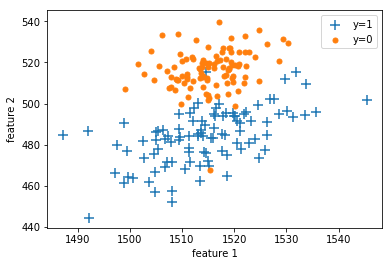

In [3]:
plt.scatter(original_X[original_y==1][:,0], original_X[original_y==1][:,1], marker='+', label='y=1', s=100)
plt.scatter(original_X[original_y==0][:,0], original_X[original_y==0][:,1], marker='.', label='y=0', s=100)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

## Implementation

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))

def compute_cost_backup(X_values, y_values, theta):
    m = len(X_values)
    h = sigmoid(X_values.dot(theta))
    cost = (-1*y_values.T.dot(np.log(h))-((1-y_values).T).dot(np.log(1-h)))/m
    grad = X_values.T.dot(h-y_values)/m
    return cost, grad

def compute_cost(X_values, y_values, theta):
    m = X_values.shape[0]
    h = sigmoid(X_values.dot(theta))    
    y1 = y_values[y_values==1].reshape(-1,1)
    y0 = y_values[y_values==0].reshape(-1,1)
    h1 = h[y_values==1].reshape(-1,1)
    h0 = h[y_values==0].reshape(-1,1)
    cost1 = -1*y1.T.dot(np.log(h1))
    cost0 = -((1-y0).T).dot(np.log(1-h0))    
    cost = (cost1+cost0)/m
    grad = X_values.T.dot(h-y_values)/m
    return cost, grad

def gradient_descent(X_values, y_values, theta, learningRate, iterations):
    m = X_values.shape[0]
    n = X_values.shape[1]
    cost = np.zeros(iterations)
    for i in range(iterations):
        cost[i], grad = compute_cost(X_values, y_values, theta)
        theta = theta - learningRate*grad                
    return theta, cost

def featureNormalize(X_values):
    mean = np.mean(X_values, axis=0)
    std = np.std(X_values, axis=0)
    X_values_normalized = (X_values-mean)/std
    return X_values_normalized, mean, std

def predict(original_X_values, theta):
    X_values = np.insert(original_X_values, 0, 1, axis=1)
    return sigmoid(X_values.dot(theta))>=0.5

### Sigmoid function

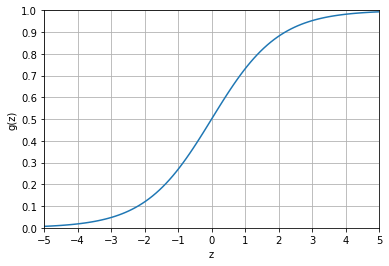

In [5]:
test_x = np.linspace(-5,5,100)
test_y = sigmoid(test_x)
plt.grid()
plt.xlabel('z')
plt.ylabel('g(z)')
ax = plt.gca() 
ax.axis([-5, 5, 0, 1]) #plt.axis([-5, 5, 0, 1])
ax.set_xticks(np.linspace(-5,5,11))
ax.set_yticks(np.linspace(0,1,11))
plt.plot(test_x, test_y)

Let $z=\theta^T x$, $g(z)=\frac{1}{1+e^{-z}}$, then the decesion is $g(z) \geq 0.5 \to y=1$ and $g(z) < 0.5 \to y=0 $. That is, $z \geq 0 \to y=1$ and $z < 0 \to y=0 $

## Logistic regression

In [6]:
X_normalized, mean, std = featureNormalize(original_X)
X = np.insert(X_normalized, 0, 1, axis=1)
y = original_y.reshape(-1, 1)
initial_theta = np.zeros((X.shape[1],1))
num_iterations = 400
learning_rate = 1

we can use `sklearn` to normalize features
```python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(original_X)
X_test_scaled = scaler.transform(X_test)
```

In [7]:
cost, grad = compute_cost(X, y, initial_theta)
print('cost=', cost)
print('grad=', grad)

cost= [[ 0.69314718]]
grad= [[ 0.005     ]
 [ 0.03038442]
 [ 0.40750925]]


In [8]:
theta, cost = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)

In [9]:
theta

array([[ 0.27196349],
       [ 1.17501383],
       [-5.44860024]])

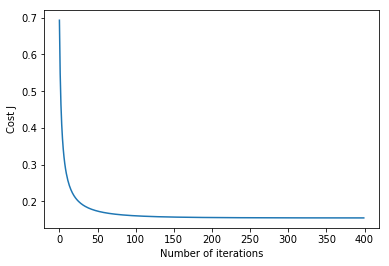

In [10]:
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.plot(range(num_iterations), cost)

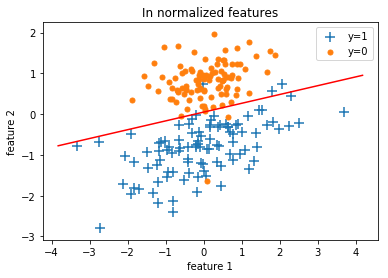

In [11]:
#decision bound
decision_x = [X_normalized[:,0].min(axis=0)-0.5, X_normalized[:,0].max(axis=0)+0.5]
decision_y = (-1/theta[2])*(theta[1]*decision_x + theta[0])

plt.plot(decision_x, decision_y, color="r")

plt.scatter(X[original_y==1][:,1],X[original_y==1][:,2], marker='+', label='y=1', s=100)
plt.scatter(X[original_y==0][:,1],X[original_y==0][:,2], marker='.', label='y=0', s=100)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.title('In normalized features')

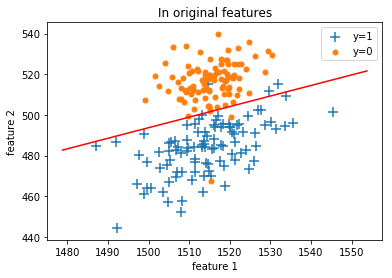

In [12]:
#decision bound
decision_x = np.array([X[:,1].min(axis=0)-1,X[:,1].max(axis=0)+1])
decision_y = (-1/theta[2])*(theta[1]*decision_x + theta[0])

decision_x = np.multiply(decision_x,std[0])+ mean[0]
decision_y = np.multiply(decision_y,std[1])+ mean[1]

plt.plot(decision_x, decision_y, color="r")

plt.scatter(original_X[original_y==1][:,0], original_X[original_y==1][:,1], marker='+', label='y=1', s=100)
plt.scatter(original_X[original_y==0][:,0], original_X[original_y==0][:,1], marker='.', label='y=0', s=100)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.title('In original features')
#plt.axis([1500, 1530, 460, 540])

## Predict and Accuracies

In [14]:
p = predict(Xnorm, theta)
predict_accuracy = np.equal(p.reshape(-1,1), y.reshape(-1,1))
print('Train Accuracy: %f\n'%(np.mean(predict_accuracy)));

Train Accuracy: 0.975000



## Optimizing using fminunc

In [15]:
import scipy.optimize as opt

In [16]:
def costFunction(theta, X_values, y_values):
    theta = theta.reshape(-1, 1)
    cost, grad = compute_cost(X_values, y_values, theta)
    return cost

def gradFunction(theta, X_values, y_values):
    theta = theta.reshape(-1, 1)
    cost, grad = compute_cost(X_values, y_values, theta)
    grad = grad.reshape(-1)
    return grad

In [17]:
X = np.insert(original_X, 0, 1, axis=1)
initial_theta = np.zeros((X.shape[1],1))
y = original_y.reshape(-1,1)
Result = opt.minimize(fun = costFunction, x0 = initial_theta, args = (X, y),
                      method = 'BFGS', jac = gradFunction, options={'maxiter': 400, 'disp': True})

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


>In this toy dataset, if we didn't normalize features, the result of opt.minimize will go wrong....

In [18]:
# normalize

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(original_X)
X = np.insert(X_scaled, 0, 1, axis=1)
initial_theta = np.zeros((X.shape[1],1))
y = original_y.reshape(-1,1)
Result = opt.minimize(fun = costFunction, x0 = initial_theta, args = (X, y),
                      method = 'BFGS', jac = gradFunction, options={'maxiter': 400, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.155028
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34


In [19]:
res_theta = Result.x
res_theta = res_theta.reshape(-1, 1)
res_theta

array([[ 11.89135726],
       [  8.51543909],
       [-26.62727718]])

In [21]:
p = predict(X_scaled, res_theta)
predict_accuracy = np.equal(p.reshape(-1,1), y.reshape(-1,1))
print('Train Accuracy: %f\n'%(np.mean(predict_accuracy)));

Train Accuracy: 0.975000



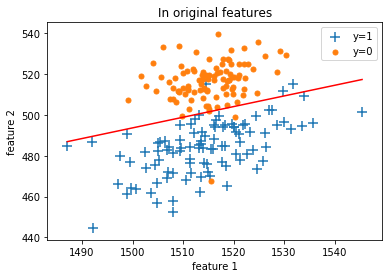

In [22]:
#decision bound
decision_x = np.array([X[:,1].min(axis=0),X[:,1].max(axis=0)])
decision_y = (-1/res_theta[2])*(res_theta[1]*decision_x + res_theta[0])
decision = np.hstack([decision_x.reshape(-1,1),decision_y.reshape(-1,1)])
decision = scaler.inverse_transform(decision)
plt.plot(decision[:,0], decision[:,1], color="r")

plt.scatter(original_X[original_y==1][:,0],original_X[original_y==1][:,1], marker='+', label='y=1', s=100)
plt.scatter(original_X[original_y==0][:,0],original_X[original_y==0][:,1], marker='.', label='y=0', s=100)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.title('In original features')

### Check with sklearn.linear_model.LinearRegression

[http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

** This class implements regularization! **

In [23]:
from sklearn import linear_model

In [24]:
logi_reg = linear_model.LogisticRegression()
logi_reg.fit(original_X, np.ravel(original_y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
logi_reg.predict_proba([[1510, 480]])

array([[ 0.00443462,  0.99556538]])

intercept_ = $\theta_0$

coef_ = $\theta_1, \theta_2$

In [26]:
logi_reg.intercept_

array([ -5.68420753e-05])

In [27]:
logi_reg.coef_ 

array([[ 0.08943547, -0.27007008]])

In [28]:
logi_reg.score(original_X, original_y)

0.96499999999999997